## The SHAP Values with More Charts

* Please read [Explain your model with the SHAP values](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d) and [The SHAP with More Elegant Charts](https://dataman-ai.medium.com/the-shap-with-more-elegant-charts-bc3e73fa1c0c)
### Table of Contents
* [Section 1: Global interpretability](#section1)
    * [Section 1.1: Bar plot](#section11)
    * [Section 1.2: Cohort plot](sSection12)
    * [Section 1.3: Heatmap plot](sSection13)
* [Section 2: Local interpretability](#section2)
    * [Section 2.1: Waterfall plot](#section21)
    * [Section 2.2: Bar plot](#section22)
    * [Section 2.3: Force plot](#section23)
    * [Section 2.4: Decision plot](#section24)
* [Section 3: Binary target](#section3)
    * [Section 3.1: Waterfall plot](#section31)    
* [Section 4: How to customize SHAP plots](#section4)
    * [Section 4.1: Legend, fontsize, etc.](#section41)
    * [Section 4.2: Subplots](#section42)
* [Section 5: The SHAP Plots for a Multiclass model](#section5)
    * [Section 5.1: Global interpretability](#section51)
    * [Section 5.2: Local interpretability](#section52)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/winequality-red.csv')

In [3]:
df.shape

(1599, 12)

In [4]:
df['quality'] = df['quality'].astype(int)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:>

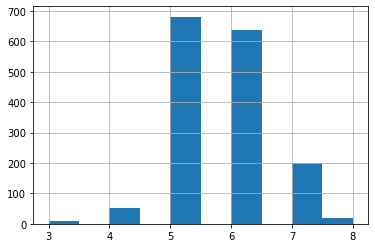

In [5]:
df['quality'].hist()

In [6]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Y = df['quality']
X =  df[features]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1234)
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [7]:
X_test.shape

(320, 11)

In [8]:
X_train.shape

(1279, 11)

## (1) Global Interpretability <a class="anchor" id="section1"></a>

In [9]:
import shap
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

### (1.1) Bar plot <a class="anchor" id="section11"></a>

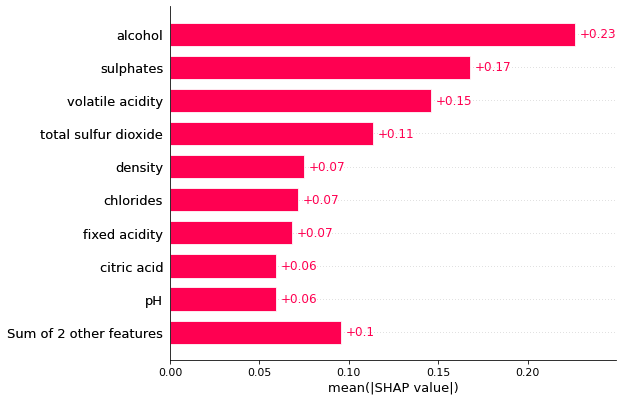

In [10]:
shap.plots.bar(shap_values, max_display=10) # default is max_display=12

### (1.2) Cohort plot  <a class="anchor" id="section12"></a>
- Create a set of cohorts
- Explanation.cohorts(N) can create N cohorts that optimally separate the SHAP values of the instances using a sklearn DecisionTreeRegressor. 
- Below shap_values.cohorts(2) creates two cohorts. 'Alcohol' is cut at 11.25. The number in brackets is the number of instances in each cohort.

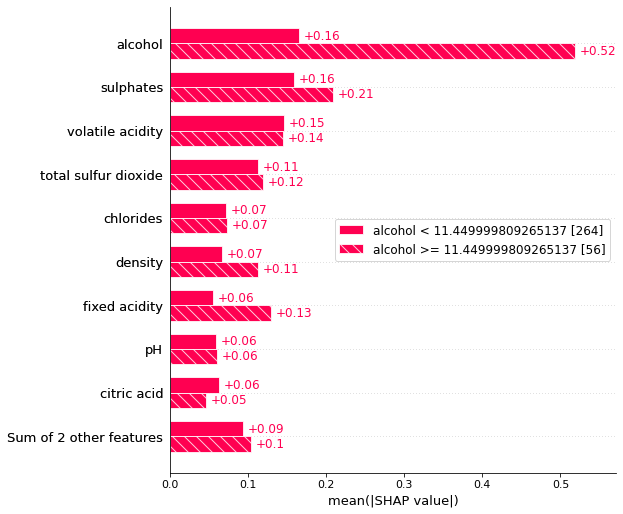

In [11]:
shap.plots.bar(shap_values.cohorts(2).abs.mean(0))

### (1.3) Heatmap  <a class="anchor" id="section13"></a>

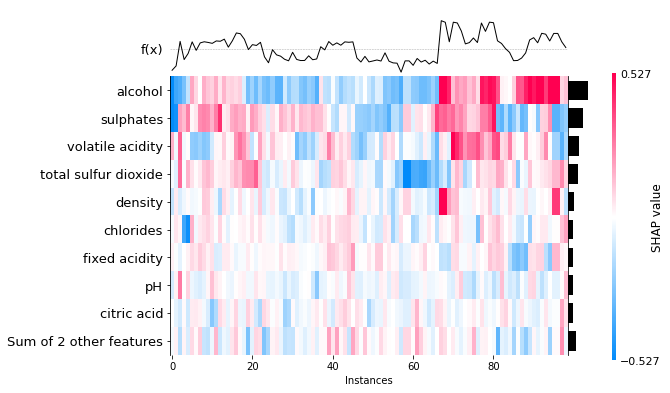

In [12]:
shap.plots.heatmap(shap_values[1:100])

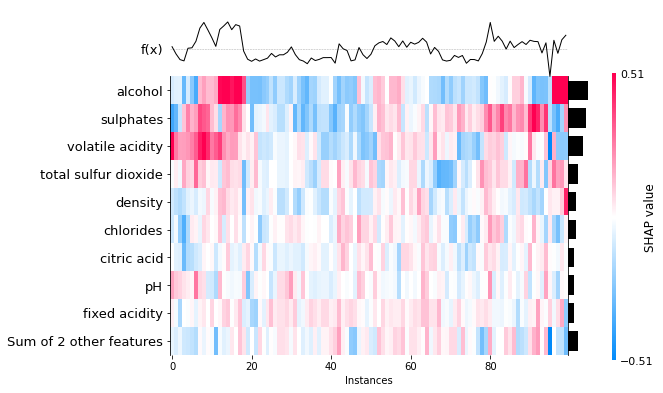

In [13]:
shap.plots.heatmap(shap_values[200:300])

## (2) Local interpretability  <a class="anchor" id="section2"></a>

### (2.1) Waterfall plot  <a class="anchor" id="section21"></a>

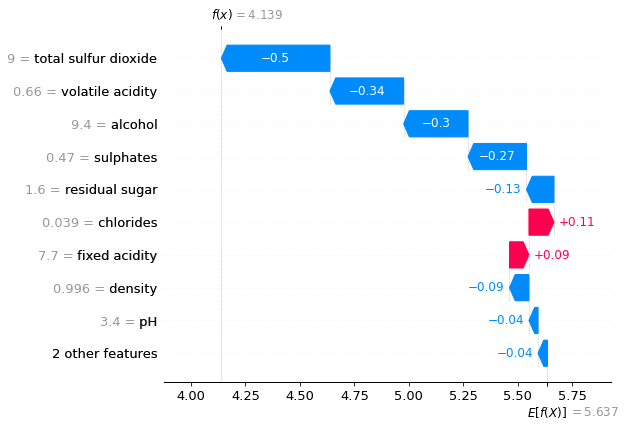

In [14]:
shap.plots.waterfall(shap_values[0]) # For the first observation

In [15]:
5.637 - 0.04 - 0.04 - 0.09 + 0.09 + 0.11 - 0.13 - 0.27 - 0.3 - 0.34 - 0.5

4.127

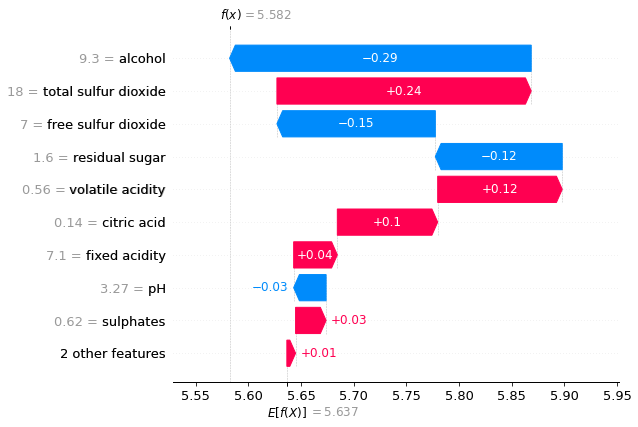

In [16]:
shap.plots.waterfall(shap_values[1]) # For the second observation

### (2.2) Bar plot <a class="anchor" id="section22"></a>

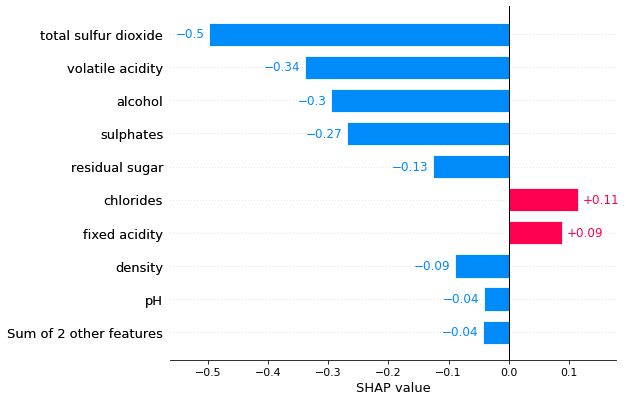

In [17]:
shap.plots.bar(shap_values[0]) # For the first observation

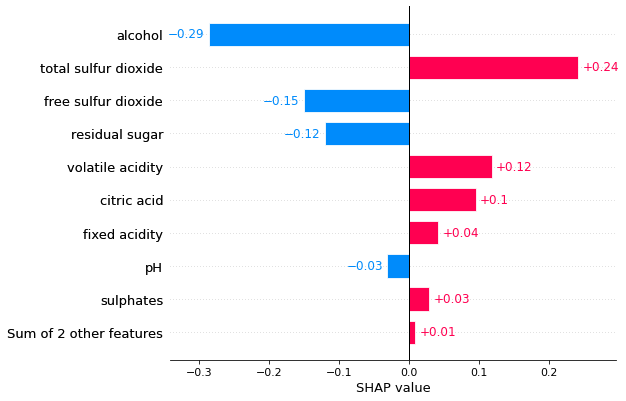

In [18]:
shap.plots.bar(shap_values[1]) # For the second observation

### (2.3) Force plot  <a class="anchor" id="section23"></a>

In [19]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
def p(j):
    return(shap.force_plot(explainer.expected_value, shap_values[j,:], X_test.iloc[j,:]))
p(0)

In [20]:
p(1)

### (2.4) Decision plot  <a class="anchor" id="section24"></a>

The final prediction is  4.1391783


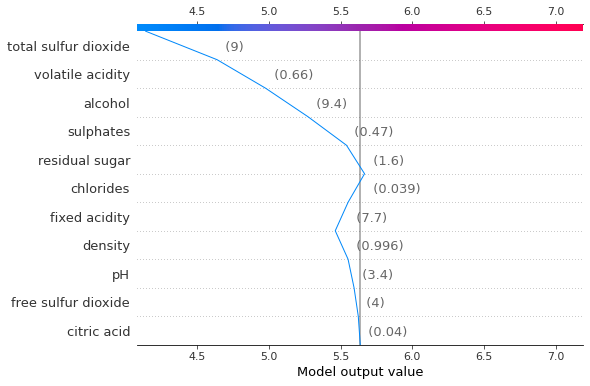

In [21]:
expected_value = explainer.expected_value
#print("The expected value is ", expected_value)
print("The final prediction is ", xgb_model.predict(X_test)[0])
shap_values = explainer.shap_values(X_test)[0]
shap.decision_plot(expected_value, shap_values, X_test)

The final prediction is  5.5821166


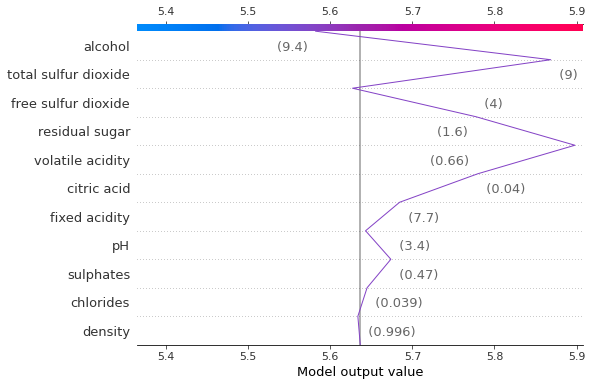

In [22]:
shap_values = explainer.shap_values(X_test)[1]
#print("The expected value is ", expected_value)
print("The final prediction is ", xgb_model.predict(X_test)[1])
shap.decision_plot(expected_value, shap_values, X_test)

## (3) Binary Target <a class="anchor" id="section3"></a>
### (3.1) Force plot  <a class="anchor" id="section31"></a>

In [23]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Y = np.where(df['quality']>5,1,0)
X =  df[features]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1234)
xgb_binary_model = xgb.XGBRegressor(objective='reg:logistic',random_state=42)
xgb_binary_model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:logistic', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [24]:
Y_pred = xgb_binary_model.predict(X_train)[0]
Y_pred

0.9925615

In [25]:
shap.initjs()
def p(j):
    explainer = shap.TreeExplainer(xgb_binary_model)
    xgb_binary_shap_values = explainer.shap_values(X_train)
    return(shap.force_plot(explainer.expected_value, xgb_binary_shap_values[j,:], X_train.iloc[j,:], link='logit'))
p(0)

### (3.2) Waterfall plot  <a class="anchor" id="section32"></a>

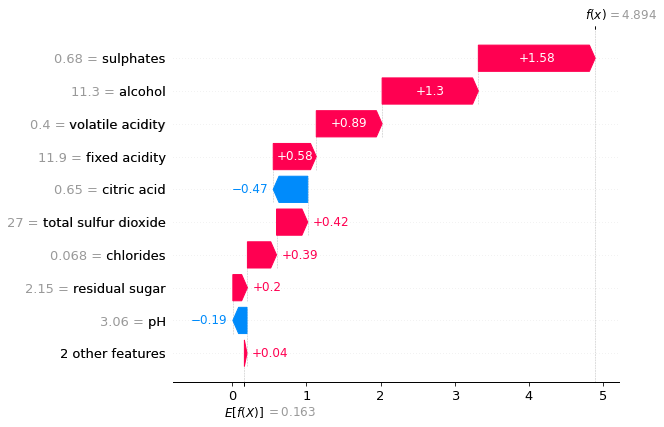

In [26]:
import shap
explainer = shap.Explainer(xgb_binary_model)
xgb_binary_shap_values = explainer(X_train)
shap.plots.waterfall(xgb_binary_shap_values[0]) # For the second observation

In [38]:
from scipy.special import expit
expit(4.894)

0.9925643068520967

In [ ]:
original_shap_values = xgb_binary_shap_values
original_shap_values

In [ ]:
#Compute the transformed base value, which consists in applying the logit function to the base value
from scipy.special import expit #Importing the logit function for the base value transformation
untransformed_base_value = original_shap_values.base_values[-1]
untransformed_base_value


In [ ]:
base_value = expit(untransformed_base_value ) # = 1 / (1+ np.exp(-untransformed_base_value))
base_value

In [ ]:
original_shap_values.values

In [ ]:
original_explanation_distance = np.sum(original_shap_values.values, axis=1)[2]
original_explanation_distance

In [ ]:
distance_to_explain = abs(Y_pred - base_value)
distance_to_explain

In [ ]:
distance_coefficient = np.abs(original_explanation_distance / distance_to_explain)
distance_coefficient

In [ ]:
original_shap_values.values[2]

In [ ]:
shap_values_transformed = original_shap_values / distance_coefficient
shap_values_transformed

In [ ]:
shap_values_transformed.base_values = base_value
shap_values_transformed.data = original_shap_values.data

In [ ]:
shap.plots.waterfall(shap_values_transformed[0])

In [41]:
def xgb_shap_transform_scale(original_shap_values, Y_pred, which):
    from scipy.special import expit
    
    #Compute the transformed base value, which consists in applying the logit function to the base value
    from scipy.special import expit #Importing the logit function for the base value transformation
    untransformed_base_value = original_shap_values.base_values[-1]
   
    #Computing the original_explanation_distance to construct the distance_coefficient later on
    original_explanation_distance = np.sum(original_shap_values.values, axis=1)[which]
    
    base_value = expit(untransformed_base_value ) # = 1 / (1+ np.exp(-untransformed_base_value))

    #Computing the distance between the model_prediction and the transformed base_value
    distance_to_explain = Y_pred[which] - base_value

    #The distance_coefficient is the ratio between both distances which will be used later on
    distance_coefficient = original_explanation_distance / distance_to_explain

    #Transforming the original shapley values to the new scale
    shap_values_transformed = original_shap_values / distance_coefficient

    #Finally resetting the base_value as it does not need to be transformed
    shap_values_transformed.base_values = base_value
    shap_values_transformed.data = original_shap_values.data
    
    #Now returning the transformed array
    return shap_values_transformed    

The prediction is  0.9925615


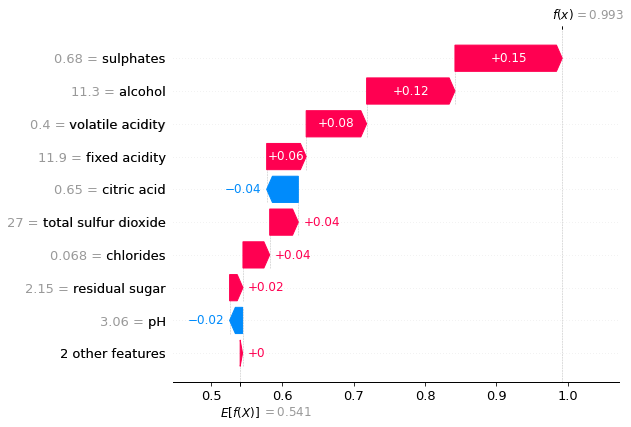

In [44]:
obs = 0
Y_pred = xgb_binary_model.predict(X_train)
print("The prediction is ", Y_pred[obs])
shap_values_transformed = xgb_shap_transform_scale(xgb_binary_shap_values, Y_pred, obs)
shap.plots.waterfall(shap_values_transformed[obs])

## (4) How to customize the SHAP Plots <a class="anchor" id="section4"></a>
### (4.1) Legend, fontsize, etc.  <a class="anchor" id="section41"></a>

The bbox_to_anchor keyword gives a great degree of control for manual legend placement. For example, if you want your axes legend located at the figure's top right-hand corner instead of the axes' corner, simply specify the corner's location and the coordinate system of that location:
https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html

In [ ]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)
shap.plots.bar(shap_values.cohorts(3).abs.mean(0))

In [ ]:
shap.plots.bar(shap_values.cohorts(3).abs.mean(0),
               show=False)
fig = plt.gcf() # gcf means "get current figure"
fig.set_figheight(11)
fig.set_figwidth(9)
#plt.rcParams['font.size'] = '12'
ax = plt.gca() #gca means "get current axes"
leg = ax.legend(bbox_to_anchor=(0., 1.02, 1., .102))
for l in leg.get_texts(): l.set_text(l.get_text().replace('Class', 'Klasse'))
plt.show()

### (4.2) Subplots  <a class="anchor" id="section32"></a>

In [ ]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
shap_values = explainer.shap_values(X_test)[0]
shap.decision_plot(expected_value, shap_values, X_test, show=False)
ax1.title.set_text('The First Observation')

ax2 = fig.add_subplot(122)
shap_values = explainer.shap_values(X_test)[1]
shap.decision_plot(expected_value, shap_values, X_test, show=False)
ax2.title.set_text('The Second Observation')
plt.tight_layout()
plt.show()

## (5) The SHAP Plots for a Multiclass model  <a class="anchor" id="section5"></a>

In [ ]:
# Multiclass
df['Multiclass'] = np.where(df['quality']>6, 'Best',  # 2 = 'Best', 1 = 'Premium', 0 = 'Value'
                      np.where(df['quality']>5, 'Premium','Value'))
Y = df['Multiclass']
X = df[features]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1234)
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X_train, Y_train)

In [ ]:
multiclass_actual_pred = pd.DataFrame(xgb_model.predict_proba(X_test)).round(2)
multiclass_actual_pred['Actual'] = Y_test.values
multiclass_actual_pred['Pred'] = xgb_model.predict(X_test)
multiclass_actual_pred.columns = ['2 - Best','1 - Premium','0 - Value','Pred','Actual']
multiclass_actual_pred.head()

In [ ]:
pd.crosstab(multiclass_actual_pred['Actual'],multiclass_actual_pred['Pred'])

In [ ]:
X_test.mean()

In [ ]:
X_test.iloc[0:2,:]

### (5.1) Global interpretability  <a class="anchor" id="section41"></a>

In [ ]:
import shap
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test,approximate=True)
plt.title('The Summary Plot for the Multiclass Model'+'\n'+'Class 2 - Best, Class 1 - Premium, Class 0 - Value')
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
np.shape(shap_values) # Three classes, 320 observations, 11 variables 

In [ ]:
fig = plt.figure(figsize=(20,10))

ax0 = fig.add_subplot(131)
ax0.title.set_text('Class 2 - Best ')
shap.summary_plot(shap_values[2], X_test, plot_type="bar", show=False)
ax0.set_xlabel(r'SHAP values', fontsize=11)
plt.subplots_adjust(wspace = 5)

ax1 = fig.add_subplot(132)
ax1.title.set_text('Class 1 - Premium')
shap.summary_plot(shap_values[1], X_test, plot_type="bar", show=False)
plt.subplots_adjust(wspace = 5)
ax1.set_xlabel(r'SHAP values', fontsize=11)

ax2 = fig.add_subplot(133)
ax2.title.set_text('Class 0 - Value')
shap.summary_plot(shap_values[0], X_test, plot_type="bar", show=False)
ax2.set_xlabel(r'SHAP values', fontsize=11)

# plt.tight_layout(pad=3) # You can also use plt.tight_layout() instead of using plt.subplots_adjust() to add space between plots
plt.show()